# IMPORT OF LIBRAIRIES 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import calendar
from functions import *
import urllib.parse
from matplotlib.pyplot import figure
import geoip2.database
import socket
from tld import get_tld

import re
import json
from urllib.request import urlopen
import pygeoip

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/adrien/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adrien/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/adrien/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
quotes_2020 = pd.io.json.read_json('quotes-2017.json.bz2', lines = True)

### Creation of a column containing the month when the month when the quote was reported


In [3]:
quotes_2020['month'] = quotes_2020['date'].dt.month.apply(lambda x: calendar.month_abbr[x])   
quotes_2020

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,day,month
0,2017-10-10-083023,left the realm of the merely destructive and e...,Tanya Plibersek,[Q7684036],2017-10-10 05:07:05,86,"[[Tanya Plibersek, 0.7071], [Tony Abbott, 0.13...",[http://armidaleexpress.com.au/story/4979274/a...,E,Tuesday,Oct
1,2017-09-06-003914,advance this climate change agenda.,Rush Limbaugh,[Q319072],2017-09-06 23:12:48,73,"[[Rush Limbaugh, 0.6842], [None, 0.2011], [Al ...",[http://feeds.nydailynews.com/~r/nydnrss/sport...,E,Wednesday,Sep
2,2017-07-06-075459,may find some allies on climate change,Donald Trump,"[Q22686, Q27947481]",2017-07-06 09:04:06,1,"[[Donald Trump, 0.624], [None, 0.376]]",[https://www.carbonbrief.org/daily-brief/volvo...,E,Thursday,Jul
3,2017-12-20-072848,Mayor Lee's commitment to environmental policy...,Gina McCarthy,[Q5562899],2017-12-20 09:00:35,1,"[[Gina McCarthy, 0.9385], [None, 0.053], [Ed L...",[http://www.sfexaminer.com/retirement-board-he...,E,Wednesday,Dec
4,2017-06-06-081706,"now under threat as never before: pollution, o...",António Guterres,[Q311440],2017-06-06 11:44:00,1,"[[António Guterres, 0.8775], [None, 0.1225]]",[https://sg.finance.yahoo.com/news/un-secretar...,E,Tuesday,Jun
...,...,...,...,...,...,...,...,...,...,...,...
30130,2017-09-22-018445,Climate change is a megatrend that has wide-ra...,None,[],2017-09-22 18:40:00,1,"[[None, 0.9198], [Bharat Masrani, 0.0802]]",[http://www.greenpeace.org/canada/en/blog/Blog...,E,Friday,Sep
30131,2017-06-12-017608,Developing countries seem to be waking up to e...,John Irvine,"[Q16142752, Q58810703, Q6240858]",2017-06-12 00:00:00,2,"[[John Irvine, 0.8938], [None, 0.1063]]",[http://punchng.com/nigeria-must-join-push-for...,E,Monday,Jun
30132,2017-09-20-032353,Global warming is an existential threat to hum...,Barbara Parker,"[Q2555588, Q4859211, Q4859212]",2017-09-20 13:15:00,6,"[[Barbara Parker, 0.4425], [None, 0.3065], [J....",[http://www.prnewswire.com/news-releases/san-f...,E,Wednesday,Sep
30133,2017-04-14-023043,"global warming is dead, nailed into its coffin...",Bret Stephens,[Q4961960],2017-04-14 20:18:33,2,"[[Bret Stephens, 0.728], [None, 0.272]]",[http://www.environmentalhealthnews.org/t/2251...,E,Friday,Apr


In [4]:
quotes_2020['date'] = quotes_2020['date'].dt.date

### Here create a serie containing the number of quotations per day in descending order 

In [5]:
quotes_date_occurence = quotes_2020.groupby('date').date.count()
quotes_date_occurence = quotes_date_occurence.sort_values(ascending= False)
quotes_date_occurence.head(10)

date
2017-06-02    960
2017-06-01    666
2017-05-31    327
2017-06-05    309
2017-06-06    273
2017-03-29    251
2017-03-28    250
2017-06-07    220
2017-09-11    211
2017-09-12    191
Name: date, dtype: int64

## Plot of the quotations reported per month

Text(-2.700000000000003, 0.5, 'Count')

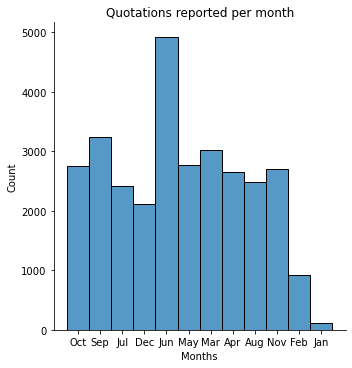

In [6]:
sns.displot(quotes_2020['month'])
plt.title('Quotations reported per month')
plt.xlabel("Months")
plt.ylabel("Count")

### We then select  the quotations reported on peak days 

In [7]:
top_ten_days = quotes_date_occurence.index[:10].astype(str)
quotations_peak  = quotes_2020[quotes_2020['date'].astype(str).apply(lambda x: x in top_ten_days.to_list())]
quotations_peak.reset_index(drop = True, inplace = True)
quotations_peak

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,day,month
0,2017-06-06-081706,"now under threat as never before: pollution, o...",António Guterres,[Q311440],2017-06-06,1,"[[António Guterres, 0.8775], [None, 0.1225]]",[https://sg.finance.yahoo.com/news/un-secretar...,E,Tuesday,Jun
1,2017-06-02-005735,American Rivers will continue to stand with th...,Bob Irvin,[Q4932894],2017-06-02,2,"[[Bob Irvin, 0.8016], [None, 0.1984]]",[https://insurancenewsnet.com/oarticle/america...,E,Friday,Jun
2,2017-06-07-029179,global warming is one of the gravest challenge...,None,[],2017-06-07,21,"[[None, 0.8978], [Donald Trump, 0.058], [Presi...",[http://mobile.sfgate.com/news/article/North-K...,E,Wednesday,Jun
3,2017-06-02-057495,"In Massachusetts and around the world, climate...",Charlie Baker,"[Q28051620, Q5076629, Q5084482, Q56254750]",2017-06-02,14,"[[Charlie Baker, 0.4938], [Governor Charlie Ba...",[http://www.bostonglobe.com/metro/2017/06/01/a...,E,Friday,Jun
4,2017-06-06-006360,and help California and Los Angelenos on clima...,Jimmy Gomez,[Q6200205],2017-06-06,3,"[[Jimmy Gomez, 0.5484], [None, 0.2221], [Frank...",[http://nbcnews.com/news/latino/latino-asian-a...,E,Tuesday,Jun
...,...,...,...,...,...,...,...,...,...,...,...
3653,2017-06-06-078926,My sense is that people understand that there'...,Bill Morneau,[Q21175197],2017-06-06,2,"[[Bill Morneau, 0.8069], [None, 0.1931]]",[http://www.ctvnews.ca/politics/morneau-says-n...,E,Tuesday,Jun
3654,2017-06-02-088546,President Trump is ignoring the impact of clim...,None,[],2017-06-02,1,"[[None, 0.8048], [President Trump, 0.1952]]",[http://www.abc2news.com/news/region/baltimore...,E,Friday,Jun
3655,2017-06-06-130301,We are disappointed with today's decision by t...,Brad Smith,"[Q15477554, Q16218831, Q23664265, Q24084114, Q...",2017-06-06,1,"[[Brad Smith, 0.9061], [None, 0.0851], [Satya ...",[http://nlpc.org/2017/06/06/hypocritical-ceos-...,E,Tuesday,Jun
3656,2017-06-02-129517,We are on the front lines addressing climate c...,None,[],2017-06-02,1,"[[None, 0.7212], [Edward Mazria, 0.194], [Pres...",[https://www.curbed.com/2017/6/2/15727258/pari...,E,Friday,Jun


## Plot of the number of quotations reported per day 

Text(0.5, 1.0, 'Number of quotations reported per day ')

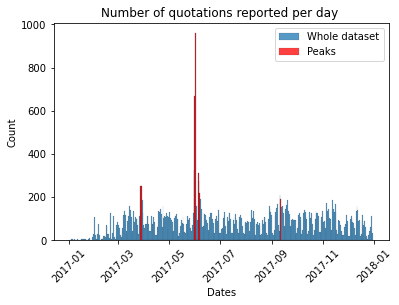

In [8]:
sns.histplot(quotes_2020['date'],label = "Whole dataset", bins =5*365)
sns.histplot(quotations_peak['date'], color = 'red',label = "Peaks") 
plt.xticks(rotation= 45 )
plt.xlabel('Dates')
plt.ylabel('Count')
plt.legend()

plt.title('Number of quotations reported per day ')

## date selection

In [9]:
date_1 = '2017-06-02'

## Url location

### creation of a dataframe with  countries Top Level Domain Names 

In [10]:
country_tld = pd.read_excel('tld_country.xlsx', header= 0)
uk_tld = {"Country" : 'UNITED KINGDOM', "TLD" :'UK'}
country_tld = country_tld.append(uk_tld,ignore_index=True)


In [11]:
country_tld

,Country,TLD
0,AFGHANISTAN,AF
1,ÅLAND ISLANDS,AX
2,ALBANIA,AL
3,ALGERIA,DZ
4,AMERICAN SAMOA,AS
...,...,...
245,WESTERN SAHARA,EH
246,YEMEN,YE
247,ZAMBIA,ZM
248,ZIMBABWE,ZW


In [12]:
country_tld['TLD'] = country_tld['TLD'].str.lower()
country_tld['Country'] = country_tld['Country'].str.lower()
country_tld


,Country,TLD
0,afghanistan,af
1,åland islands,ax
2,albania,al
3,algeria,dz
4,american samoa,as
...,...,...
245,western sahara,eh
246,yemen,ye
247,zambia,zm
248,zimbabwe,zw


In [13]:
quotes_cop = quotations_peak[quotations_peak.date.astype(str)== date_1 ]
quotes_cop.reset_index(drop = True, inplace = True)

In [14]:
urls_vect = quotes_cop.urls



In [15]:
count =pd.Series([ len(listElem) for listElem in urls_vect])
#number of sources per quotations on average
count.mean()


7.129166666666666

In [16]:


website_vect = []
tld_vect = []
for urls in urls_vect:
    
    for j in urls:
        
        parsed_url = urllib.parse.urlparse(j)[1]
        website_vect.append(parsed_url)
        tld_vect.append(get_tld(j))

        #print(domain)
 

In [17]:
country_tld

,Country,TLD
0,afghanistan,af
1,åland islands,ax
2,albania,al
3,algeria,dz
4,american samoa,as
...,...,...
245,western sahara,eh
246,yemen,ye
247,zambia,zm
248,zimbabwe,zw


## detection of the location of an url first based on the tld and if the tld is .com .org ... we use the ip adress

In [18]:
country_website = []

for j in range(len(tld_vect)):
    
    
    try:
        ip = socket.gethostbyname(website_vect[j])
        
        reader = geoip2.database.Reader('GeoLite2-Country.mmdb')
        response = reader.country(ip)
        
        country = np.array(country_tld.Country[country_tld.TLD ==response.country.iso_code.lower()])[0]# Results in 'US'
        
    except Exception:

        country = None
   
    
    for i in range(country_tld.shape[0]):
        
        if tld_vect[j] =='co.uk':
            
            country = np.array(country_tld.Country[country_tld.TLD == 'uk'])[0]
        
        elif country_tld.TLD[i] in  tld_vect[j].split('.'):
            
            country = country_tld.Country[i]
    
    country_website.append(country)
        
        

In [19]:
country_url = pd.DataFrame({'website': website_vect , 'Country': country_website})
country_url

,website,Country
0,insurancenewsnet.com,united states
1,www.americanrivers.org,united states
2,www.bostonglobe.com,switzerland
3,www.bostonglobe.com,switzerland
4,boston.cbslocal.com,united states
...,...,...
6839,feeds.nydailynews.com,united states
6840,www.nydailynews.com,switzerland
6841,www.eenews.net,None
6842,www.abc2news.com,united states


## plot of the locations of the urls

<AxesSubplot:>

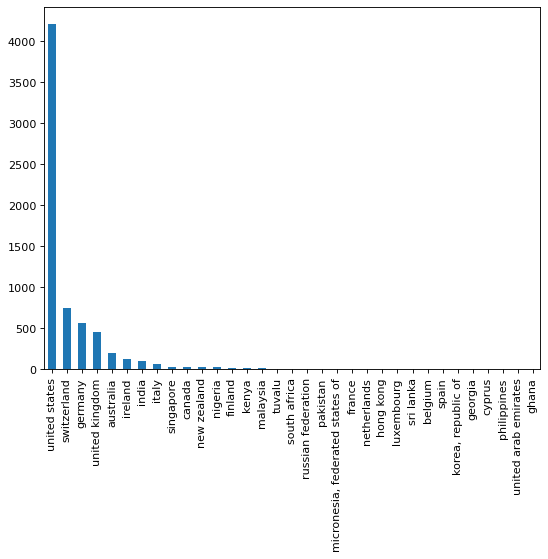

In [20]:

figure(figsize=(8, 6), dpi=80)
country_url.Country.value_counts().plot(kind='bar')
#plt.yscale('log')

In [21]:
quotations_only = quotes_cop.quotation

In [22]:
quotes_cop

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,day,month
0,2017-06-02-005735,American Rivers will continue to stand with th...,Bob Irvin,[Q4932894],2017-06-02,2,"[[Bob Irvin, 0.8016], [None, 0.1984]]",[https://insurancenewsnet.com/oarticle/america...,E,Friday,Jun
1,2017-06-02-057495,"In Massachusetts and around the world, climate...",Charlie Baker,"[Q28051620, Q5076629, Q5084482, Q56254750]",2017-06-02,14,"[[Charlie Baker, 0.4938], [Governor Charlie Ba...",[http://www.bostonglobe.com/metro/2017/06/01/a...,E,Friday,Jun
2,2017-06-02-029125,He believes that global warming is naturally o...,Kellyanne Conway,[Q6386365],2017-06-02,260,"[[Kellyanne Conway, 0.8911], [President Donald...",[http://abcnews.go.com/Technology/wireStory/tr...,E,Friday,Jun
3,2017-06-02-141583,we're rescinding our leadership on addressing ...,None,[],2017-06-02,1,"[[None, 0.6552], [President Trump, 0.3448]]",[http://midwestenergynews.com/digests/minnesot...,E,Friday,Jun
4,2017-06-02-123575,"Through our witness, we recognize that our gov...",None,[],2017-06-02,1,"[[None, 0.8703], [President Donald Trump, 0.12...",[http://catholicphilly.com/2017/06/news/nation...,E,Friday,Jun
...,...,...,...,...,...,...,...,...,...,...,...
955,2017-06-02-034432,"However, undermining action addressing climate...",Chris Lee,"[Q1077464, Q1077474, Q12305774, Q16221404, Q22...",2017-06-02,1,"[[Chris Lee, 0.729], [None, 0.2665], [Ivanka T...",[http://www.civilbeat.org/2017/06/pulling-out-...,E,Friday,Jun
956,2017-06-02-122785,This was not a litmus test on the reality of c...,R.C. Hammond,[Q7273320],2017-06-02,115,"[[R.C. Hammond, 0.7746], [None, 0.1849], [Rex ...",[http://mobile.sfgate.com/news/politics/articl...,E,Friday,Jun
957,2017-06-02-017552,Climate change is an international problem tha...,None,[],2017-06-02,4,"[[None, 0.7418], [President Trump, 0.1471], [G...",[http://feeds.nydailynews.com/~r/nydnrss/news/...,E,Friday,Jun
958,2017-06-02-088546,President Trump is ignoring the impact of clim...,None,[],2017-06-02,1,"[[None, 0.8048], [President Trump, 0.1952]]",[http://www.abc2news.com/news/region/baltimore...,E,Friday,Jun


In [23]:
quotations_only[0]

"American Rivers will continue to stand with these local leaders, and we will continue helping communities build their resilience with innovative river conservation solutions. We will work to ensure the United States remains a global leader in river restoration and protection, because a healthy river is a community's best defense against the impacts of climate change."

## Pronouns

In [24]:
pronouns_us =  ['we' ,'us' , 'ours' , 'our' ,'mine' , "mine" , 'I' , 'Me' , 'Mine' , "Mines" , 'We' , 'Us' , 'Ours' , 'Our']
pronouns_them =  ['them' , "they" , 'their' , 'theirs',  'He' , "his"  , 'him', "They" , 'Them' , 'Their' , 'Theirs' , 'He' , "His" , 'Him']

 

mask_us_them= [ ((us in quotes) and  (them in quotes)) for quotes in quotations_only for us in pronouns_us  for them in pronouns_them ]
            
mask_us = [ (us in quotes)  for quotes in quotations_only for us in pronouns_us  ]            
 
    
mask_us_them = []
mask_us = []


mask_them = []

for quote in quotations_only:
    any_us = False
    for us in pronouns_us :
        if us in quote:
            any_us = True
            break
    
    mask_us.append(any_us)


for quote in quotations_only:
    any_them = False
    for them in pronouns_them :
        if them in quote:
            any_them = True
            break
    
    mask_them.append(any_them)
    
    
for quote in quotations_only:
    any_us_them = False
    for them in pronouns_them :
        for us in pronouns_us:
            if (them in quote) and (us in quote):
                any_us_them = True
                break
        break
    
    mask_us_them.append(any_us_them)

        
        
        

quotes_us = quotes_cop[mask_us]

quotes_them = quotes_cop[mask_them]

quotes_us_them = quotes_cop[mask_us_them]

quotes_us_them.quotation.iloc[5]


quotes_us.shape



(715, 11)

In [25]:
quotes_us_them.quotation.iloc[2]

"This summer broke countless heat records in Sydney. We've seen coral bleaching in the harbour and the clock is ticking on climate change. We want governments working with our cities, supporting us, having policies of their own-but if not, we need them to get out of the way and let us do what has to be done."

## Sentiment analysis  

<AxesSubplot:ylabel='Frequency'>

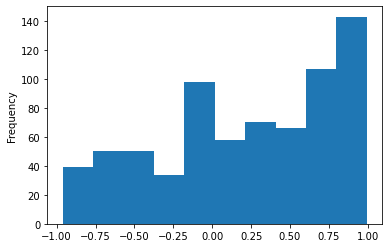

In [26]:

coumpound_sentiment_us = quotes_us.quotation.apply(lambda x : analyzer.polarity_scores(x)["compound"])
coumpound_sentiment_us.plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

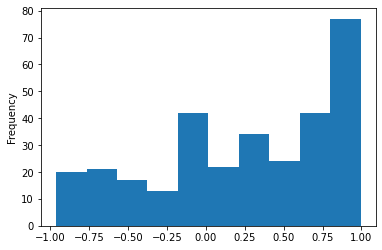

In [27]:

coumpound_sentiment_them = quotes_them.quotation.apply(lambda x : analyzer.polarity_scores(x)["compound"])
coumpound_sentiment_them.plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

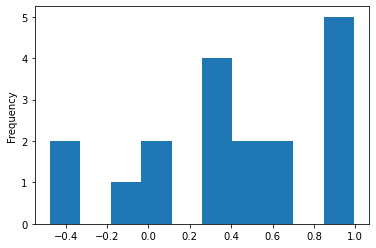

In [28]:

coumpound_sentiment_us_them = quotes_us_them.quotation.apply(lambda x : analyzer.polarity_scores(x)["compound"])
coumpound_sentiment_us_them.plot(kind = 'hist')

## mean sentiment values for all the text by combining all the quotes in a flat list

In [29]:
flat_list_us_them = " ".join([quotes for quotes in quotes_us_them.quotation])

flat_list_us = " ".join([quotes for quotes in quotes_us.quotation])

flat_list_them = " ".join([quotes for quotes in quotes_them.quotation])



In [30]:
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores(flat_list_us_them)

In [31]:
vs

{'neg': 0.089, 'neu': 0.737, 'pos': 0.174, 'compound': 0.9994}

In [32]:
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores(flat_list_us)

In [33]:
vs

{'neg': 0.091, 'neu': 0.734, 'pos': 0.176, 'compound': 1.0}

In [34]:
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores(flat_list_them)

In [35]:
vs

{'neg': 0.086, 'neu': 0.749, 'pos': 0.165, 'compound': 1.0}

In [36]:
coumpound_sentiment_us_them.mean()

0.4134444444444445

In [37]:
coumpound_sentiment_us.mean()

0.22588447552447574

In [38]:
coumpound_sentiment_them.mean()

0.2560096153846151

## coherence

In [39]:

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Other NLP
import re
import spacy

from nltk.corpus import stopwords

# General Plotting
import matplotlib.pyplot as plt
 
import seaborn as sns


# Special Plotting
import pyLDAvis
import pyLDAvis.gensim_models 

# ignore some warnings 
import warnings
warnings.filterwarnings('ignore')

# Set the maximum number of rows displayed by pandas
pd.options.display.max_rows = 1000

# Set some CONSTANTS that will be used later
SEED    = 41  # base to generate a random number


In [40]:

from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/adrien/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
! python -m spacy download en_core_web_sm

  Using cached en_core_web_sm-2.3.1-py3-none-any.whl
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [42]:
spacy.load('en_core_web_sm')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adrien/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
cop = quotations_peak[quotations_peak.date.astype(str) == date_1]

In [44]:
def preprocess(txt):
    txt = " ".join(simple_preprocess(txt))
    
    
    
    return txt

In [45]:
cop['quotation'] = cop['quotation'].apply(lambda x : preprocess(x))

In [46]:
def lemmatize_text(txt):
    word_tokens = word_tokenize(txt)
    lemmatized_output = [WordNetLemmatizer().lemmatize(w) for w in word_tokens ]
    
    
    return lemmatized_output

In [47]:
cop['quotation'] = cop['quotation'].apply(lambda x : lemmatize_text(x))


In [48]:
# Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

dictionary = corpora.Dictionary(cop['quotation'])

In [49]:
#Filter out tokens that appear in
#less than 15 documents (absolute number) or
#more than 0.5 documents (fraction of total corpus size, not absolute number).
#after the above two steps, keep only the first 100000 most frequent tokens.

dictionary.filter_extremes(no_below = 5, no_above=0.1, keep_n= 200)

### Gensim doc2bow

In [50]:
#For each document we create a dictionary reporting how many
#words and how many times those words appear. Save this to ‘bow_corpus’, 
#then check our selected document earlier.
bow_corpus = [dictionary.doc2bow(q) for q in cop['quotation']]
bow_corpus[12] #(token id, token count for document 12)

[(57, 1), (58, 1)]

### LDA model

In [56]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics= 5, id2word=dictionary, passes=2, workers = 2)

 ## Visualization of the top keywwords for each model (topics)

In [57]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.032*"more" + 0.028*"new" + 0.021*"fight" + 0.020*"against" + 0.020*"leadership" + 0.017*"support" + 0.017*"why" + 0.017*"york" + 0.017*"take" + 0.017*"committed"
Topic: 1 
Words: 0.032*"about" + 0.022*"more" + 0.020*"he" + 0.020*"wa" + 0.019*"planet" + 0.018*"continue" + 0.017*"issue" + 0.015*"than" + 0.015*"his" + 0.013*"can"
Topic: 2 
Words: 0.026*"decision" + 0.025*"energy" + 0.024*"effort" + 0.020*"united" + 0.017*"leader" + 0.015*"leadership" + 0.015*"real" + 0.015*"other" + 0.014*"business" + 0.014*"commitment"
Topic: 3 
Words: 0.031*"you" + 0.021*"they" + 0.019*"or" + 0.019*"at" + 0.019*"people" + 0.018*"future" + 0.016*"their" + 0.016*"what" + 0.014*"if" + 0.013*"decision"
Topic: 4 
Words: 0.033*"need" + 0.029*"address" + 0.024*"china" + 0.020*"commitment" + 0.018*"he" + 0.017*"his" + 0.017*"can" + 0.016*"if" + 0.015*"do" + 0.014*"policy"


In [58]:
cm = CoherenceModel(model=lda_model, texts = cop['quotation'], dictionary = dictionary, coherence = 'c_v')
coherence = cm.get_coherence()  # get coherence value
print("The average coherence score for all the topics is ",coherence)

The average coherence score for all the topics is  0.22939606587150338


In [59]:
# Visualize topics-keywords
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.005399  0.034793       1        1  27.364926
3     -0.049419  0.036177       2        1  24.442435
1     -0.030212  0.028698       3        1  20.094474
0      0.117711 -0.011579       4        1  14.169314
4     -0.043479 -0.088088       5        1  13.928851, topic_info=               Term        Freq       Total Category  logprob  loglift
53             need   69.000000   69.000000  Default  30.0000  30.0000
112         address   62.000000   62.000000  Default  29.0000  29.0000
133             you   86.000000   86.000000  Default  28.0000  28.0000
164           about   91.000000   91.000000  Default  27.0000  27.0000
37             more  113.000000  113.000000  Default  26.0000  26.0000
76             they   67.000000   67.000000  Default  25.0000  25.0000
114      commitment   80.000000   80.000000  Default  24.0000  24.0000
116             new   75.000000   75.000000  Default  23.0000  23.0000
145           china   76.000000   76.000000  Default  22.0000  22.0000
90              his   56.000000   56.000000  Default  21.0000  21.0000
0           against   60.000000   60.000000  Default  20.0000  20.0000
144             why   30.000000   30.000000  Default  19.0000  19.0000
22       leadership   85.000000   85.000000  Default  18.0000  18.0000
118            york   33.000000   33.000000  Default  17.0000  17.0000
19               he   83.000000   83.000000  Default  16.0000  16.0000
100              wa   72.000000   72.000000  Default  15.0000  15.0000
80          support   56.000000   56.000000  Default  14.0000  14.0000
45           taking   31.000000   31.000000  Default  13.0000  13.0000
72           health   40.000000   40.000000  Default  12.0000  12.0000
43            fight   82.000000   82.000000  Default  11.0000  11.0000
38           policy   31.000000   31.000000  Default  10.0000  10.0000
183       committed   42.000000   42.000000  Default   9.0000   9.0000
113    announcement   21.000000   21.000000  Default   8.0000   8.0000
102            what   62.000000   62.000000  Default   7.0000   7.0000
142          people   72.000000   72.000000  Default   6.0000   6.0000
163          planet   72.000000   72.000000  Default   5.0000   5.0000
189          better   24.000000   24.000000  Default   4.0000   4.0000
15           future   83.000000   83.000000  Default   3.0000   3.0000
7            leader   69.000000   69.000000  Default   2.0000   2.0000
130              if   85.000000   85.000000  Default   1.0000   1.0000
122    disappointed   16.470817   20.347029   Topic1  -4.9520   1.0846
157          tackle   12.919092   19.641343   Topic1  -5.1949   0.8770
50           effort   55.175330   84.007545   Topic1  -3.7430   0.8755
137            such   18.292532   27.997352   Topic1  -4.8471   0.8703
156           under   14.547265   22.828040   Topic1  -5.0762   0.8453
8             stand   18.155559   28.752055   Topic1  -4.8546   0.8362
139             big   16.004306   25.764162   Topic1  -4.9807   0.8198
33           carbon   29.090319   48.016608   Topic1  -4.3832   0.7948
126          energy   58.505338  101.776086   Topic1  -3.6844   0.7423
110            also   27.536810   48.096157   Topic1  -4.4380   0.7382
86         decision   59.894887  104.904679   Topic1  -3.6610   0.7354
117           while   17.491213   30.932256   Topic1  -4.8919   0.7258
21       addressing   23.566696   41.694082   Topic1  -4.5937   0.7254
7            leader   38.867594   69.575147   Topic1  -4.0934   0.7137
105        withdraw   20.082510   36.287863   Topic1  -4.7537   0.7043
155           clean   28.165565   52.182493   Topic1  -4.4155   0.6793
47         business   32.597103   61.558198   Topic1  -4.2693   0.6601
44            other   33.895942   64.069579   Topic1  -4.2303   0.6592
184              am   16.666978   31.533992   Topic1  -4.9401   0.6583
52             must   26.9237

In [55]:
cop

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,day,month
1,2017-06-02-005735,"[american, river, will, continue, to, stand, w...",Bob Irvin,[Q4932894],2017-06-02,2,"[[Bob Irvin, 0.8016], [None, 0.1984]]",[https://insurancenewsnet.com/oarticle/america...,E,Friday,Jun
3,2017-06-02-057495,"[in, massachusetts, and, around, the, world, c...",Charlie Baker,"[Q28051620, Q5076629, Q5084482, Q56254750]",2017-06-02,14,"[[Charlie Baker, 0.4938], [Governor Charlie Ba...",[http://www.bostonglobe.com/metro/2017/06/01/a...,E,Friday,Jun
10,2017-06-02-029125,"[he, belief, that, global, warming, is, natura...",Kellyanne Conway,[Q6386365],2017-06-02,260,"[[Kellyanne Conway, 0.8911], [President Donald...",[http://abcnews.go.com/Technology/wireStory/tr...,E,Friday,Jun
11,2017-06-02-141583,"[we, re, rescinding, our, leadership, on, addr...",None,[],2017-06-02,1,"[[None, 0.6552], [President Trump, 0.3448]]",[http://midwestenergynews.com/digests/minnesot...,E,Friday,Jun
13,2017-06-02-123575,"[through, our, witness, we, recognize, that, o...",None,[],2017-06-02,1,"[[None, 0.8703], [President Donald Trump, 0.12...",[http://catholicphilly.com/2017/06/news/nation...,E,Friday,Jun
15,2017-06-02-109839,"[the, same, week, president, donald, trump, pu...",None,[],2017-06-02,3,"[[None, 0.4666], [James Rainey, 0.2852], [Just...",[http://nbcnews.com/politics/first-read/it-s-t...,E,Friday,Jun
16,2017-06-02-019336,"[dangerous, threat, of, climate, change]",None,[],2017-06-02,1,"[[None, 0.8029], [George W. Bush, 0.1664], [Pr...",[http://www.pennlive.com/opinion/2017/06/pitts...,E,Friday,Jun
19,2017-06-02-001433,"[critical, step, forward, in, addressing, clim...",Larry Fink,"[Q3218882, Q6490307]",2017-06-02,11,"[[Larry Fink, 0.7079], [None, 0.2364], [Presid...",[https://www.nytimes.com/interactive/2017/06/0...,E,Friday,Jun
27,2017-06-02-080959,"[not, benefit, cost, analysis, of, climate, ch...",None,[],2017-06-02,1,"[[None, 0.701], [Donald Trump, 0.299]]",[http://news.yahoo.com/news/why-donald-trump-g...,E,Friday,Jun
28,2017-06-02-003335,"[abdicating, it, leadership, and, taking, back...",None,[],2017-06-02,2,"[[None, 0.483], [Andrew Cuomo, 0.3167], [Presi...","[http://www.rttnews.com/story.aspx?Id=2780913,...",E,Friday,Jun
